In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
den = pd.read_csv('dengue.csv')

In [4]:
#![](dengueIMG) to insert img in jupyter

![](dengueIMG.png)

In [5]:
den

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Describe Analytics</h1>

In [6]:
den.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [7]:
den.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


In [8]:
den.dtypes


Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Data Cleaning</h1>

In [9]:
den.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>GEOSPATIAL ANALYSIS</h1>
<h2>Using FOLIUM Library or LEAFLET JS</h2>

In [10]:
df = pd.read_csv('dengue.csv')

In [11]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [12]:
# Data Cleaning & Preparation
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
den['Month'] = pd.Categorical(den['Month'], categories=month_order, ordered=True)


In [13]:
df['Region'].unique()

array(['Region I', 'Region II', 'Region III', 'Region IV-A',
       'Region IV-B', 'Region V', 'Region VI', 'Region VII',
       'Region VIII', 'Region IX', 'Region X', 'Region XI', 'Region XII',
       'Region XIII', 'NCR', 'CAR', 'BARMM'], dtype=object)

<hr><h1>10 Insights </h1> <hr>

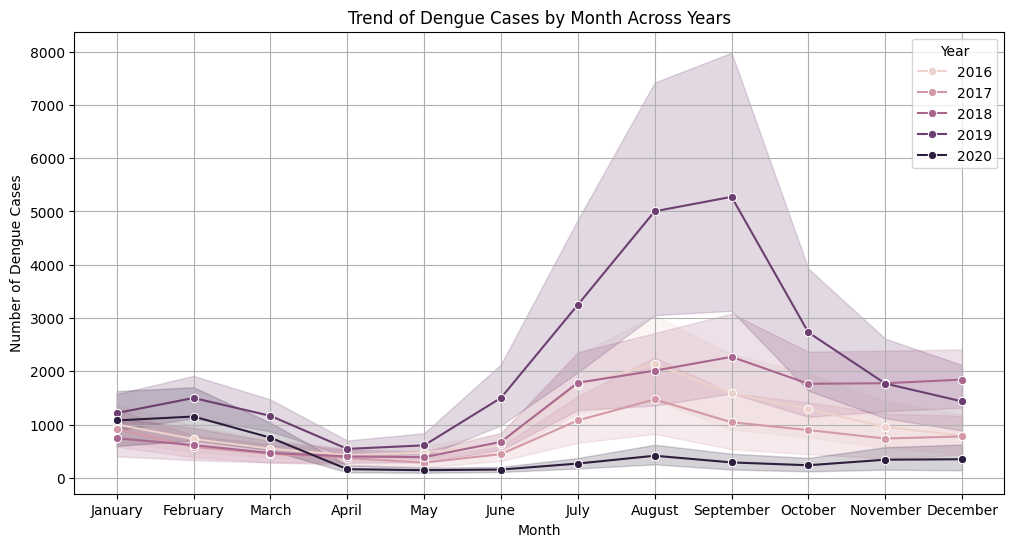

In [14]:
#LINE CHART: Trend of Dengue Cases by Month (All Years)
plt.figure(figsize=(12, 6))
sns.lineplot(data=den, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title("Trend of Dengue Cases by Month Across Years")
plt.xlabel("Month")
plt.ylabel("Number of Dengue Cases")
plt.grid(True)
plt.show()


<h1>INSIGHT 1</h1>
<p>Dengue cases tend to rise during the rainy months (around June–October) across most years.</p> <hr>

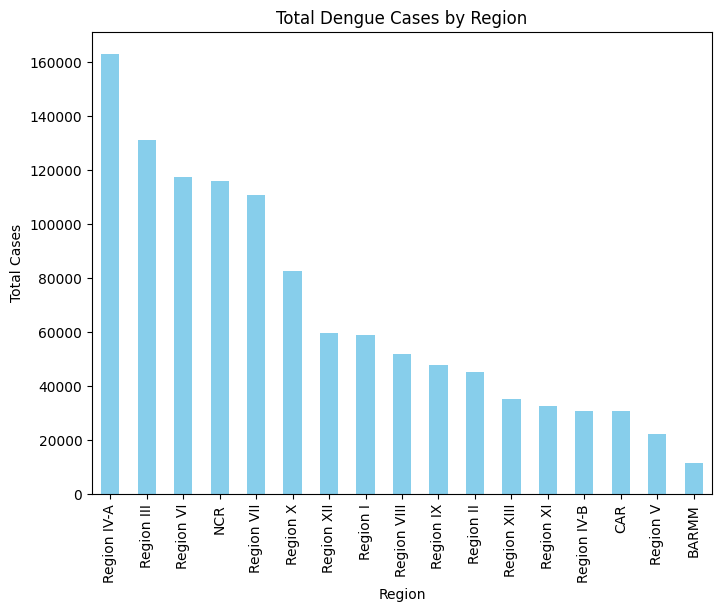

In [15]:
#BAR CHART: Total Dengue Cases by Region
region_cases = den.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
region_cases.plot(kind='bar', color='skyblue')
plt.title("Total Dengue Cases by Region")
plt.ylabel("Total Cases")
plt.xlabel("Region")
plt.show()


<h1>INSIGHT 2</h1>
<p>The bar chart shows that Region IV-A (CALABARZON) recorded the highest number of dengue cases, reaching over 160,000 total cases. This is significantly higher than all other regions.
Following IV-A, Region III (Central Luzon), Region VI (Western Visayas), and the National Capital Region (NCR) also reported high dengue cases, all exceeding 110,000 cases.</p> <hr>

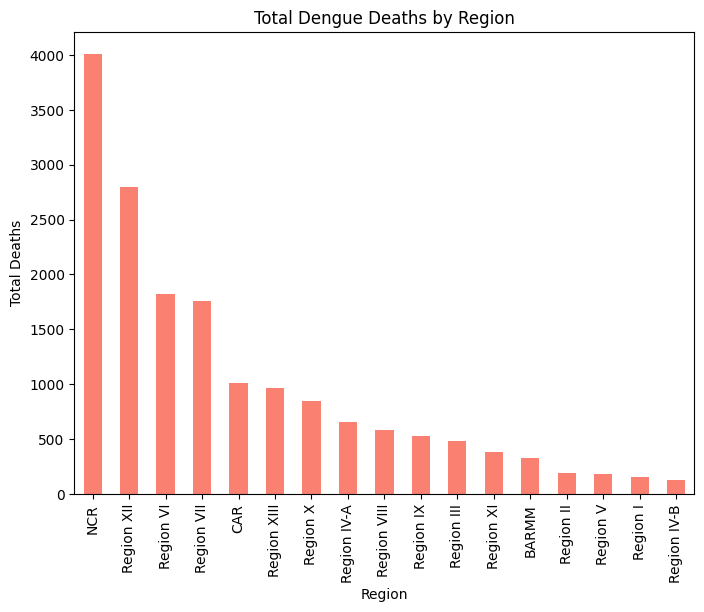

In [16]:
#BAR CHART: Total Dengue Deaths by Region
region_deaths = den.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
region_deaths.plot(kind='bar', color='salmon')
plt.title("Total Dengue Deaths by Region")
plt.ylabel("Total Deaths")
plt.xlabel("Region")
plt.show()


<h1>INSIGHT 3</h1>
<p>The chart reveals that the National Capital Region (NCR) recorded the highest number of dengue-related deaths, reaching around 4,000 deaths. It is followed by Region XII (SOCCSKSARGEN) and Region VI (Western Visayas), both with over 1,800 deaths.</p> <hr> 

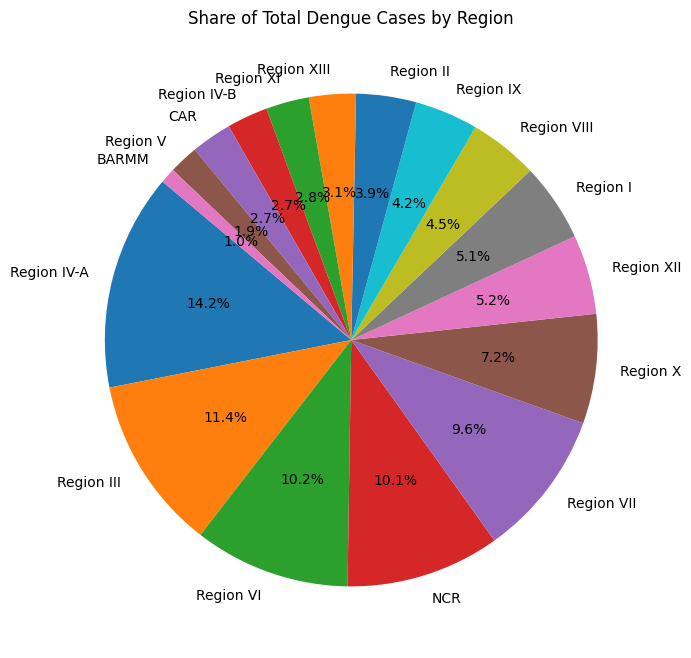

In [17]:
#PIE CHART: Share of Dengue Cases by Region
plt.figure(figsize=(8, 8))
plt.pie(region_cases, labels=region_cases.index, autopct='%1.1f%%', startangle=140)
plt.title("Share of Total Dengue Cases by Region")
plt.show()


<h1>INSIGHT 4 </h1>
<p>The pie chart shows that Region IV-A (CALABARZON) accounts for the largest share of dengue cases at 14.2% of the national total. It is followed by Region III (Central Luzon) with 11.4%, Region VI (Western Visayas) with 10.2%, and the National Capital Region (NCR) with 10.1%.

Meanwhile, BARMM has the lowest share, contributing only 1.0% of total dengue cases.</p> <hr>

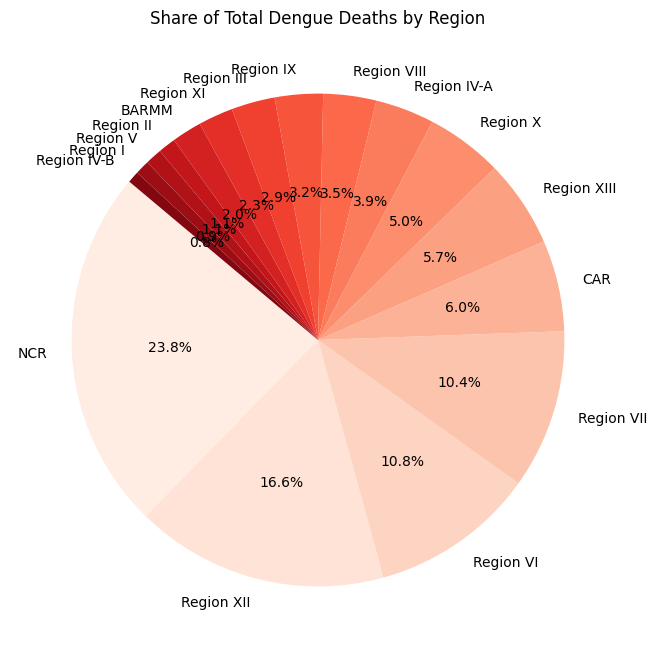

In [18]:
# PIE CHART: Share of Deaths by Region
plt.figure(figsize=(8, 8))
plt.pie(region_deaths, labels=region_deaths.index, autopct='%1.1f%%',
        colors=sns.color_palette("Reds", len(region_deaths)), startangle=140)
plt.title("Share of Total Dengue Deaths by Region")
plt.show()


<h1>INSIGHT 5</h1>
<p>The pie chart shows that the National Capital Region (NCR) accounts for the largest share of dengue-related deaths, making up 23.8% of the total deaths in the country. It is followed by Region XII (SOCCSKSARGEN) with 16.6%, and Region VI (Western Visayas) with 10.8%.</p> <HR></HR>

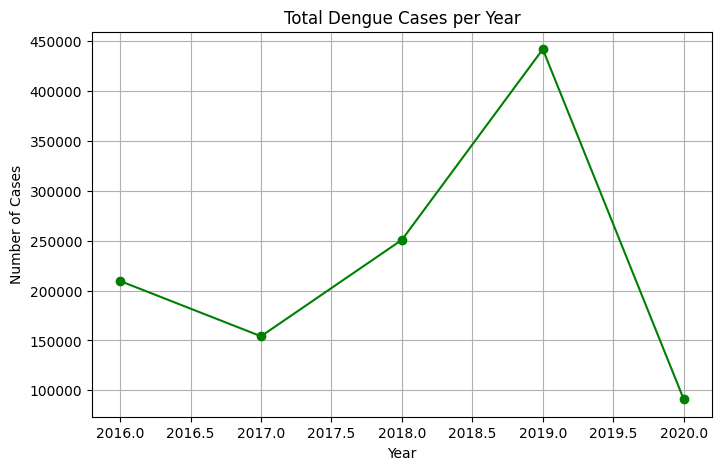

In [19]:
#LINE CHART: Yearly Dengue Case Trend
yearly_cases = den.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(8, 5))
plt.plot(yearly_cases.index, yearly_cases.values, marker='o', color='green')
plt.title("Total Dengue Cases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()


<h1>INSIGHT 6</h1>
<p>Dengue outbreaks fluctuate yearly — possibly influenced by weather or control efforts.</p> <hr>

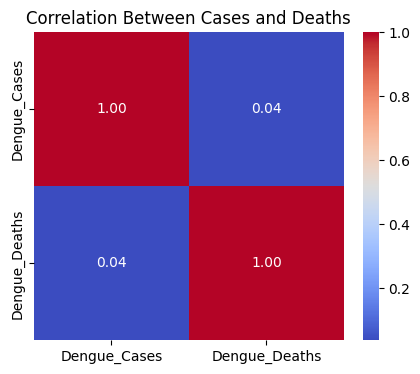

In [20]:
#HEATMAP: Correlation Between Dengue Cases and Deaths
corr = den[['Dengue_Cases', 'Dengue_Deaths']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Cases and Deaths")
plt.show()


<h1>INSIGHT 7</h1> 
<p>The heatmap shows a very weak correlation (0.04) between dengue cases and dengue deaths.
This means that an increase in dengue cases does not strongly predict an increase in deaths.</p> <hr>


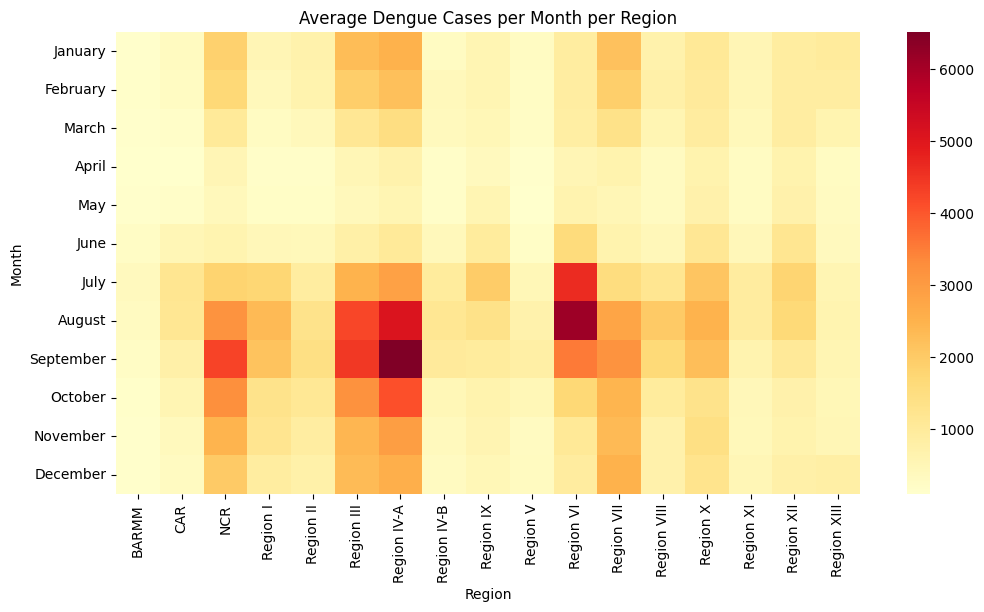

In [21]:
#HEATMAP: Average Dengue Cases per Month per Region
pivot_cases = den.pivot_table(index='Month', columns='Region',
                                 values='Dengue_Cases', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_cases, cmap='YlOrRd')
plt.title("Average Dengue Cases per Month per Region")
plt.show()


<h1>INSIGHT 8 </h1>
<p>The heatmap shows that dengue cases peak between July and September, especially in Region IV-A and Region VI.
These months and regions record the highest dengue activity, likely due to the rainy season, which increases mosquito breeding.</p> <hr>

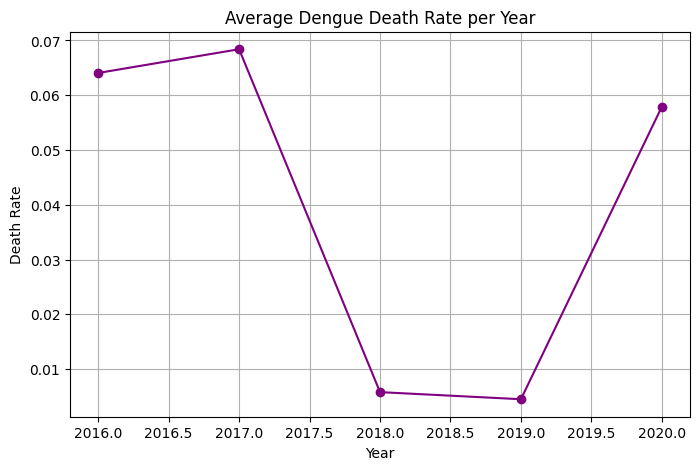

In [22]:
#LINE CHART: Average Dengue Death Rate per Year
den['Death_Rate'] = den['Dengue_Deaths'] / den['Dengue_Cases']
death_rate = den.groupby('Year')['Death_Rate'].mean()
plt.figure(figsize=(8, 5))
plt.plot(death_rate.index, death_rate.values, marker='o', color='purple')
plt.title("Average Dengue Death Rate per Year")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.grid(True)
plt.show()


<h1>INSIGHT 9</h1>
<p>The dengue death rate fluctuated from 2016 to 2020—peaking in 2016–2017, dropping sharply in 2018–2019, and rising again in 2020. This pattern highlights early progress in control efforts but a possible resurgence linked to health challenges during the pandemic..</p> <hr>

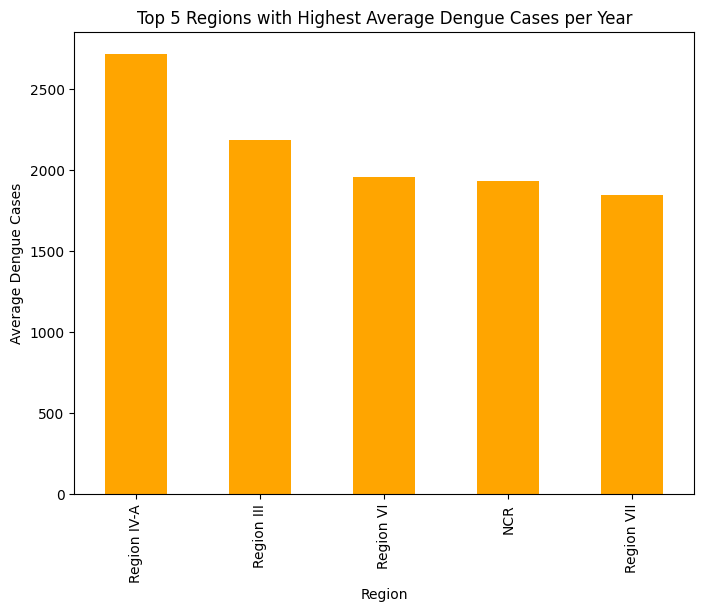

In [23]:
#BAR CHART: Top 5 Regions with Highest Average Cases per Year
avg_cases = den.groupby('Region')['Dengue_Cases'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 6))
avg_cases.plot(kind='bar', color='orange')
plt.title("Top 5 Regions with Highest Average Dengue Cases per Year")
plt.ylabel("Average Dengue Cases")
plt.xlabel("Region")
plt.show()


<h1>INSIGHT 10</h1>
<p>Region IV-A recorded the highest average dengue cases, followed by Regions III, VI, NCR, and VII. This suggests that dengue is most prevalent in densely populated and urbanized areas.</p> <hr>

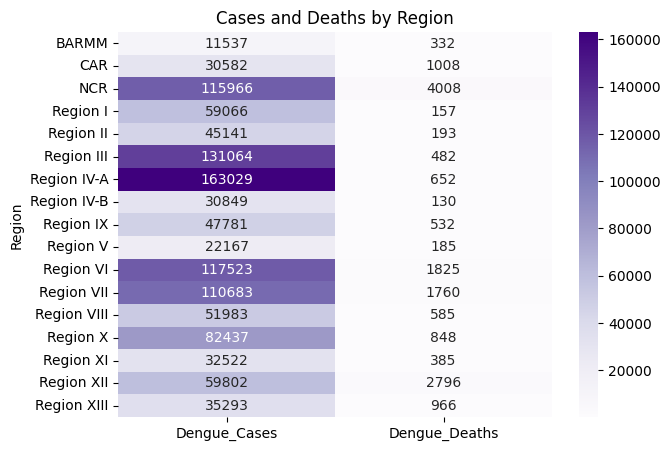

In [24]:
heatmap_data = den.groupby('Region')[['Dengue_Cases','Dengue_Deaths']].sum()

plt.figure(figsize=(7,5))
sns.heatmap(heatmap_data, cmap="Purples", annot=True, fmt=".0f")
plt.title("Cases and Deaths by Region")
plt.show()

<h1> INSIGHT 11: Highest Dengue Cases</h1>
<P>Region IV-A recorded the highest number of dengue cases (163,029), followed by Region III (131,064) and NCR (115,966).</P>

<h1> INSIGHT 12: Dengue Deaths Distribution </h1>
<p>Although Region IV-A had the highest cases, Region XII and NCR reported the highest dengue-related deaths (2,796 and 4,008 respectively).
</p> <hr> 

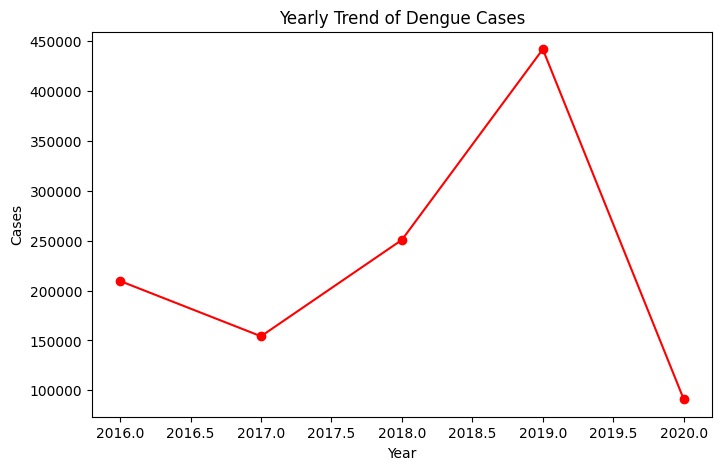

In [26]:
trend = den.groupby('Year')['Dengue_Cases'].sum()

plt.figure(figsize=(8,5))
plt.plot(trend.index, trend.values, marker='o', color='red')
plt.title("Yearly Trend of Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.show()

<h1>INSIGHT 13</h1>
<p>The yearly trend shows a dramatic increase in dengue cases in 2019, reaching the highest point among all recorded years. However, there is a sharp decline in 2020, likely due to improved public health measures, heightened awareness, or reduced outdoor activity during the COVID-19 pandemic. This pattern highlights how external factors and health interventions can greatly impact dengue case trends.</p> <hr>

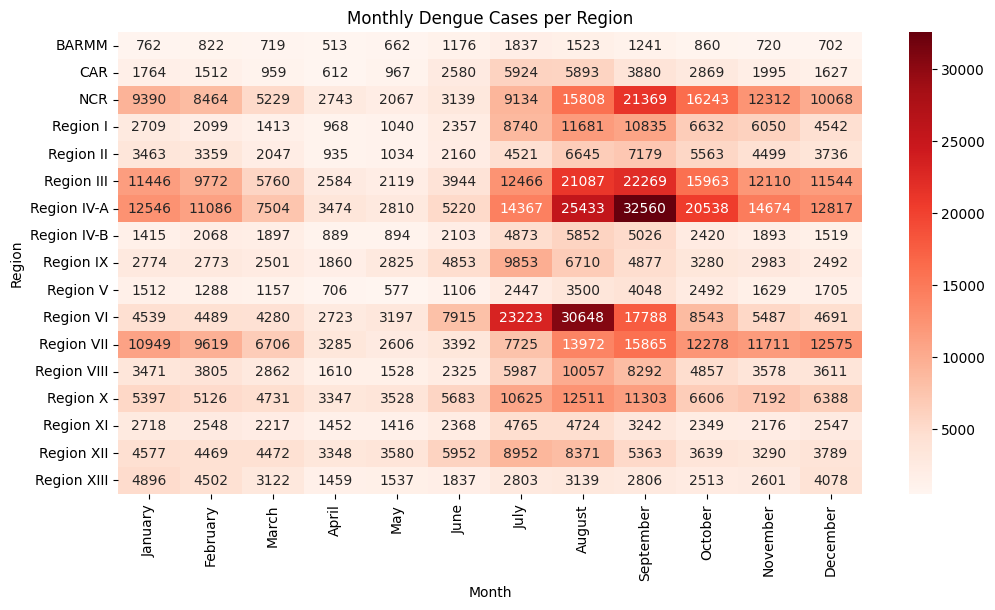

In [29]:
heatmap_data = den.pivot_table(values='Dengue_Cases', index='Region', columns='Month', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".0f")
plt.title("Monthly Dengue Cases per Region")
plt.show()

<h1>INSIGHT 14. Peak Dengue Months</h1>
<p>Most regions experienced the highest number of dengue cases between August and October, particularly in Region IV-A, Region VI, and Region III.

</p>

<h1>INSIGHT 15. Lower Incidence in Certain Regions</h1>
<p>Regions like BARMM, Region V, and Region XI show comparatively lower dengue cases across all months.</p> <hr>